<a href="https://colab.research.google.com/github/A8Y/StudyAI/blob/master/Day1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN DAY1  終了課題

IrisデータをつかってDNNの実装

 **多項分類問題**


---


*  Q1. Irisデータを使って実際にNNを構築。従来の分類手法では分類できない点がある非線形問題をかかえているので、NNで精度を高めることができるかさぐってみる。

*  Q2. 与えられた目的変数がIrisの3つの種類というカテゴリーなので、多項分類問題として扱った。与えられた特徴変数四つを使っていかに高精度で分類できるか。 従来の統計分類法では特徴変数同士をかけ合わせたりして、新しい特徴値を使って精度を高めていた。

*  Q3.　irisデータとは3つのクラスの目的変数、4つの特徴変数をもつ150のデータ点からなるデータである。


---


>  目的変数カテゴリー：　0 = 'Setosa', 1 = 'Versicolour', 2 = 'Virginica'

>  入力データX

* 特徴値4：SL='Sepal Length', SW='Sepal Width', PL='Petal Length', PW = 'Petal Width'

* データ数150

** 構築するNN **　全結合4-5-3

中間層１: 5ノード　--- Irisデータは小さく、ほとんどが線形境界線で分類可能なのでシンプルな構造のニューラルネットワークを構築

中間活性化関数：　ReLU

出力活性化関数：　Softmax

誤差関数：　交差エントロピー

学習率：　固定


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Pythonライブラリ基礎講座/DNN_code_colab_ver200425')

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from common import functions
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
d = np.array(Y)
df = pd.DataFrame(X)
df.columns = ['SL', 'SW', 'PL',' PW']
df['Species'] = Y
df.shape

(150, 5)

In [ ]:
df.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


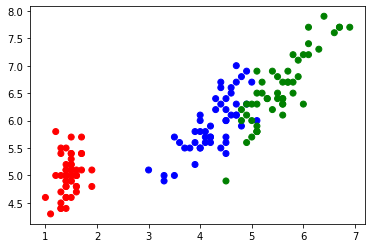

In [ ]:
colors = df.Species.map({0:'r', 1:'b', 2:'g'})
plt.scatter(df.PL, df.SL, color=colors)

In [ ]:
from sklearn import preprocessing
print(iris.data.shape)
# normalize the data attributes
stamdardized_X = preprocessing.scale(X)

(150, 4)


In [ ]:
df_std = pd.DataFrame(stamdardized_X)
df_std.columns = ['SL', 'SW', 'PL',' PW']

In [ ]:

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")


In [ ]:
# 順伝播(単層・単ユニ）
#Input
x = np.array(df_std)

# 重み 
W = np.random.rand(4,3)

#Bias
b = np.random.rand(3)



# 総入力
u = np.dot(x, W)+b

# 出力
z = functions.softmax(u)


In [ ]:
#  学習前の出力
#  パラメータが最適化されていないので全く学習できていない
metrics.confusion_matrix(d, np.argmax(z, axis=1))

array([[ 0, 50,  0],
       [50,  0,  0],
       [50,  0,  0]])

## 全結合4-5-3ネットワーク

In [ ]:
# 順伝播(3層・複数ユニット）4-5-3　ネットワーク
# 入力層: 4ノード
# 中間層: 5ノード
# 出力層: 3ノード


# ウェイトとバイアスを設定
# ネットワークを作成
def init_network():
  #print("##### ネットワークの初期化 #####")
  network = {}
  
  network['W1'] = np.random.rand(4,5)
  network['W2'] = np.random.rand(5,3)

  network['b1'] = np.random.rand(5)
  network['b2'] = np.random.rand(3)

  return network

In [ ]:
# プロセスを作成
# ｘ：入力値

# 順伝播
def forward(network, x):

  #print('#### 順伝播開始 ####')

  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']

  # 1層の総入力
  u1 = np.dot(x, W1) +b1
  # 1層の総出力
  z1 = functions.relu(u1)
  # 2層の総入力
  u2 = np.dot(z1, W2) + b2  
  # 出力
  y = functions.softmax(u2)

 # print_vec("総入力1", u1)
 # print_vec("中間層出力1", z1)
 # print_vec("総入力2", u2)
 # print_vec("出力", y)

#   print("出力合計: ")
#   print( np.sum(y,axis=1))

  return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
  #print('\n #####誤差逆伝播開始#####')

  grad={}  

  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']

  # 出力層でのデルタ
  delta2 = functions.d_softmax_with_loss(d, y)
  # b2の勾配
  grad['b2'] = np.sum(delta2, axis=0)
  # W3の勾配
  grad['W2'] = np.dot(z1.T, delta2)
  # 中間層でのデルタ
  delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

  grad['b1'] = np.sum(delta1, axis=0)

  grad['W1'] = np.dot(x.T, delta1)


  #print_vec("偏微分_dE/du2", delta2)
  #print_vec("偏微分_dE/du2", delta1)

  # print_vec("偏微分_重み1", grad["W1"])
  # print_vec("偏微分_重み2", grad["W2"])
  # print_vec("偏微分_バイアス1", grad["b1"])
  # print_vec("偏微分_バイアス2", grad["b2"])

  return grad


In [ ]:
# 入力データ x iris feature input
# 目標出力 d iris species

# 学習率
learning_rate = 0.01

# ネットワークの初期化
network =  init_network()

y, z1 = forward(network, x)

# 各データ点で最大値のクラスを選ぶ
#y_cls = np.argmax(y, axis=1)

# 誤差
loss = functions.cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

#print("##### 結果表示 #####") 
#print("##### 更新後パラメータ #####") 
#print_vec("重み1", network['W1'])
#print_vec("重み2", network['W2'])
#print_vec("バイアス1", network['b1'])
#print_vec("バイアス2", network['b2'])


In [ ]:
# 勾配降下法でiterativeにパラメータの最適化を図る

# 各EpochでXエントロピーを収納する変数を用意
losses = []
# 学習率
learning_rate = 0.1

# パラメータの初期化
network = init_network()

for i in range(2000):
  y, z1 = forward(network, x)
  grad = backward(x, d, z1, y)
  # パラメータに勾配適用
  for key in ('W1', 'W2', 'b1', 'b2'):
    network[key] -= learning_rate * grad[key]

  # エラー
  loss = functions.cross_entropy_error(d,y)
  losses.append(loss)

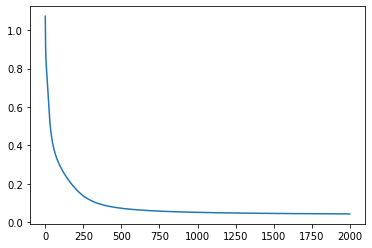

In [ ]:
# 交差エントロピーの収束グラフ

plt.plot(range(len(losses)), losses)

In [ ]:
def accuracy(Y_test, y_test):
  conf = metrics.confusion_matrix(Y_test, np.argmax(y_test, axis=1))
  print(conf)
  return (conf[0,1]+conf[0,2]+conf[1,0]+ conf[1,2]+conf[2,0]+conf[2,1])/len(Y_test)


accuracy(d, y)


[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


0.02

### 全結合4-5-3ネットワークの考察

誤差関数がエポック500あたりからほとんど減少しなくなるので、過学習を防ぐためにも早めに学習を終了させることも考えられる。

## ホールドアウト法でモデル検証

データ数が少ないのでCV法ではなくホールドアウトで検証する

トレーニングデータとテストデータを8:2でわけた。その際、データのばらつきを少なくするために、各カテゴリーから１０個のデータをランダムにサンプルしてテストデータとした。

In [ ]:
j0 = 0
id_test =[]
for i in range(3):
  j = (50*(i+1))
  id_test.extend(df.iloc[j0:j].sample(10).index)
  j0 = j
print(id_test)
X_test = np.array(df_std.iloc[id_test])
Y_test = np.array(Y[id_test])
rg = list(range(150))
for i in id_test:
  rg.remove(i)
len(rg)
X_train = np.array(df_std.loc[rg])
Y_train = np.array(Y[rg])

[28, 32, 26, 37, 21, 27, 0, 3, 23, 49, 71, 78, 55, 67, 60, 79, 92, 74, 64, 83, 119, 128, 100, 149, 136, 146, 118, 117, 120, 138]


In [ ]:
#検証誤差
def Test_Loss(Y_test, X_test,network ):
  z =X_test.dot(network['W1'])+network['b1']
  out = z.dot(network['W2'])+network['b2']
  y_test = functions.softmax(out)
  t_l = functions.cross_entropy_error(Y_test,y_test)
  return t_l 

In [ ]:
# 勾配降下法でiterativeにパラメータの最適化を図る

# 各EpochでXエントロピーを収納する変数を用意
losses = []
test_losses = []

# 学習率
learning_rate = 0.1

# パラメータの初期化
network = init_network()

for i in range(2000):
  y, z1 = forward(network, X_train)
  grad = backward(X_train, Y_train, z1, y)
  # パラメータに勾配適用
  for key in ('W1', 'W2', 'b1', 'b2'):
    network[key] -= learning_rate * grad[key]
  

  # エラー
  loss = functions.cross_entropy_error(Y_train,y)
  losses.append(loss)
  test_losses.append(Test_Loss(Y_test, X_test, network))

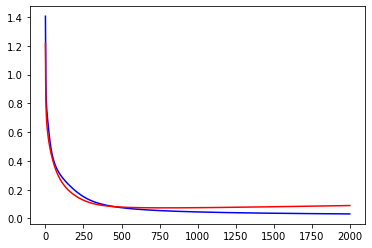

In [ ]:
# 交差エントロピーの収束グラフ

plt.plot(range(len(losses)), losses, color='b')
plt.plot(range(len(losses)), test_losses, color='r')
#plt.title('交差エントロピーの収束グラフ')

In [ ]:
# 学習誤差
accuracy(Y_train, y)

[[40  0  0]
 [ 0 39  1]
 [ 0  1 39]]


0.016666666666666666

In [ ]:
# テスト誤差

z =X_test.dot(network['W1'])+network['b1']
out = z.dot(network['W2'])+network['b2']
y_test = functions.softmax(out)
y_label = np.argmax(y_test, axis=1)

In [ ]:
accuracy(Y_test, y_test)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


0.03333333333333333

## 結果と結論

サンプルサイズ120の訓練データで学習したモデルをテストデータで検証したところ、結果に非常にばらつきがあることが分かった。ランダムにサンプルされたデータではあるが、サンプルサイズが小さいので学習には限界がある。

モデルの安定化を図るためにも罰則を取り入れて過学習を抑えること、早めに学習を終了させることなどが考えられる。

学習率については単純なモデルと小さなサンプルサイズということもあり、固定値を微調整することで問題なかったが、学習率最適化法などを取り入れることが複雑なモデルでは必要になってくる

精度を上げるために層を増やしたところ直ちに勾配消失問題が起きた。今後の課題とする

In [ ]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k', linewidth=0.5)
                ax.add_artist(line)

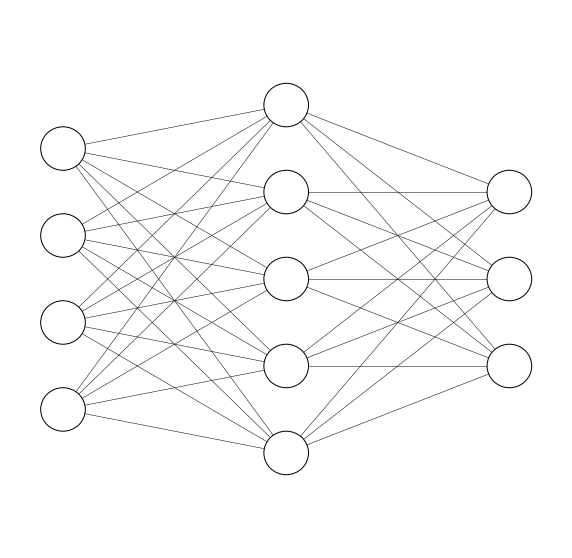

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])
fig.savefig('nn.png')